学习使用R语言实现计量经济学的OLS回归。

# 小样本OLS

## 基本回归

In [2]:
library(haven)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


In [3]:
nerlove <- read_dta("stata_data/nerlove.dta")
nerlove

# A tibble: 145 × 10
       tc     q    pl    pf    pk    lntc   lnq  lnpf  lnpk  lnpl
    <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl>
 1 0.0820     2  2.10  17.9   183 -2.50   0.693  2.88  5.21 0.742
 2 0.661      3  2.10  35.1   174 -0.414  1.10   3.56  5.16 0.742
 3 0.990      4  2.10  35.1   171 -0.0101 1.39   3.56  5.14 0.742
 4 0.315      4  1.80  32.2   166 -1.16   1.39   3.47  5.11 0.588
 5 0.197      5  2.10  28.6   233 -1.62   1.61   3.35  5.45 0.742
 6 0.0980     9  2.10  28.6   195 -2.32   2.20   3.35  5.27 0.742
 7 0.949     11  2     35.5   206 -0.0523 2.40   3.57  5.33 0.693
 8 0.675     13  2.10  35.1   150 -0.393  2.56   3.56  5.01 0.742
 9 0.525     13  2.20  29.1   155 -0.644  2.56   3.37  5.04 0.788
10 0.501     22  1.70  15     188 -0.691  3.09   2.71  5.24 0.531
# ℹ 135 more rows
# ℹ Use `print(n = ...)` to see more rows

In [ ]:
# 尝试回归
fit <- lm(lntc ~ lnq + lnpl + lnpk + lnpf, data = nerlove)
summary(fit)


Call:
lm(formula = lntc ~ lnq + lnpl + lnpk + lnpf, data = nerlove)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97203 -0.23377 -0.01091  0.16185  1.80985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.56651    1.77938  -2.004    0.047 *  
lnq          0.72091    0.01743  41.352  < 2e-16 ***
lnpl         0.45596    0.29980   1.521    0.131    
lnpk        -0.21515    0.33983  -0.633    0.528    
lnpf         0.42581    0.10032   4.244 3.97e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3923 on 140 degrees of freedom
Multiple R-squared:  0.926,	Adjusted R-squared:  0.9239 
F-statistic: 437.9 on 4 and 140 DF,  p-value: < 2.2e-16


在R中首先汇报的残差的情况，在Stata中并没有相关信息。

然后汇报的系数、系数标准差、P值，和Stata差不多，但是没有汇报置信区间，这个需要用其他函数算出来。

残差标准差就是Stata中的Root MSE，一般不需要汇报。

汇报了R方和调整R方。

最后汇报了F检验的结果，没有列出MS，SS，df，直接汇报了F值与p值。

R语言和Stata得到的结果有所差异，但是从显著性上来看没啥区别。

In [25]:
# 考虑到R的结果中没有直接汇报置信区间，因此使用函数单独汇报
confint(fit)

                 2.5 %      97.5 %
(Intercept) -7.0844477 -0.04857793
lnq          0.6864462  0.75538078
lnpl        -0.1367602  1.04868925
lnpk        -0.8870089  0.45671363
lnpf         0.2274721  0.62415537

In [26]:
# 可以指定不同的置信水平
confint(fit, level = 0.90)

                    5 %       95 %
(Intercept) -6.51283315 -0.6201925
lnq          0.69204664  0.7497803
lnpl        -0.04045088  0.9523799
lnpk        -0.77784097  0.3475457
lnpf         0.25969983  0.5919277

In [27]:
# 考虑到F检验结果不全，可以使用anova函数
anova(fit)

Analysis of Variance Table

Response: lntc
           Df  Sum Sq Mean Sq   F value    Pr(>F)    
lnq         1 264.995 264.995 1722.1770 < 2.2e-16 ***
lnpl        1   1.751   1.751   11.3808   0.00096 ***
lnpk        1   0.006   0.006    0.0418   0.83830    
lnpf        1   2.772   2.772   18.0156 3.966e-05 ***
Residuals 140  21.542   0.154                        
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
# 获取估计系数的协方差矩阵
# 使用vcov()
vcov(fit)

             (Intercept)           lnq          lnpl          lnpk
(Intercept)  3.166202262 -0.0045190893 -0.1509553442 -0.5931767640
lnq         -0.004519089  0.0003039326 -0.0003593777  0.0003496681
lnpl        -0.150955344 -0.0003593777  0.0898812656  0.0249753667
lnpk        -0.593176764  0.0003496681  0.0249753667  0.1154841196
lnpf         0.007843726  0.0003008868 -0.0112483137 -0.0066953499
                     lnpf
(Intercept)  0.0078437258
lnq          0.0003008868
lnpl        -0.0112483137
lnpk        -0.0066953499
lnpf         0.0100644671

In [ ]:
# 去掉常数项
# 在预测变量部分+0 或-1
fit <- lm(lntc ~ lnq + lnpl + lnpk + lnpf-1, data = nerlove)
summary(fit)


Call:
lm(formula = lntc ~ lnq + lnpl + lnpk + lnpf - 1, data = nerlove)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90755 -0.25306 -0.02383  0.17782  1.78064 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
lnq   0.71582    0.01743  41.065  < 2e-16 ***
lnpl  0.28592    0.29061   0.984    0.327    
lnpk -0.88332    0.06669 -13.245  < 2e-16 ***
lnpf  0.43465    0.10129   4.291 3.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3964 on 141 degrees of freedom
Multiple R-squared:  0.9693,	Adjusted R-squared:  0.9685 
F-statistic:  1114 on 4 and 141 DF,  p-value: < 2.2e-16


In [16]:
fit <- lm(lntc ~ lnq + lnpl + lnpk + lnpf+0, data = nerlove)
summary(fit)


Call:
lm(formula = lntc ~ lnq + lnpl + lnpk + lnpf + 0, data = nerlove)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.90755 -0.25306 -0.02383  0.17782  1.78064 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
lnq   0.71582    0.01743  41.065  < 2e-16 ***
lnpl  0.28592    0.29061   0.984    0.327    
lnpk -0.88332    0.06669 -13.245  < 2e-16 ***
lnpf  0.43465    0.10129   4.291 3.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3964 on 141 degrees of freedom
Multiple R-squared:  0.9693,	Adjusted R-squared:  0.9685 
F-statistic:  1114 on 4 and 141 DF,  p-value: < 2.2e-16


## 子样本回归

In [23]:
# 对子样本进行回归
# 考虑到代码的易读性，使用管道符实现
nerlove_sub <- nerlove |> 
  filter(q >= 6000)

fit_sub <- lm(lntc ~ lnq + lnpl + lnpk + lnpf, data = nerlove_sub)
summary(fit_sub)


Call:
lm(formula = lntc ~ lnq + lnpl + lnpk + lnpf, data = nerlove_sub)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.267771 -0.080328 -0.000927  0.127097  0.229716 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9.3436     3.0748  -3.039 0.014046 *  
lnq           1.2124     0.1956   6.197 0.000159 ***
lnpl          0.6916     0.5185   1.334 0.214996    
lnpk          0.2464     0.5680   0.434 0.674654    
lnpf          0.1567     0.4341   0.361 0.726551    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1926 on 9 degrees of freedom
Multiple R-squared:  0.8857,	Adjusted R-squared:  0.8349 
F-statistic: 17.43 on 4 and 9 DF,  p-value: 0.0002881


In [30]:
# 计算被解释变量的拟合值hat_y
head(predict(fit))

        1         2         3         4         5         6 
-2.620937 -2.031039 -1.819903 -1.920526 -1.812802 -1.350754 

In [32]:
# 计算残差
head(residuals(fit))

         1          2          3          4          5          6 
 0.1199015  1.6170375  1.8098530  0.7653431  0.1882501 -0.9720341 

## 检验回归假定

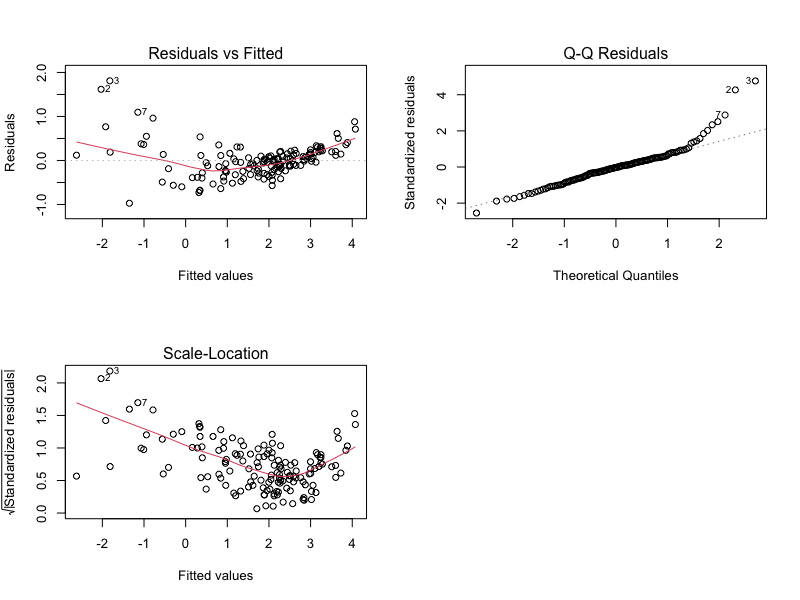

In [ ]:
# 标准方法
par(mfrow = c(2, 2))
plot(fit)
par(mfrow = c(1, 1))

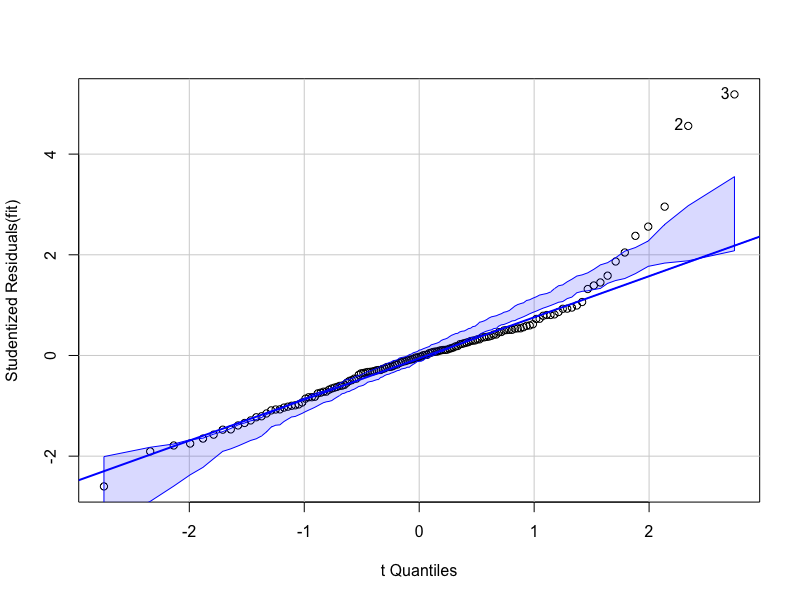

[1] 2 3

In [66]:
library(car)
qqPlot(fit, simulate = TRUE, mian = "Q-Q Plot")

In [67]:
# 执行 Shapiro-Wilk 正态性检验
shapiro.test(fit$residuals)


	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.91501, p-value = 1.528e-07


In [68]:
install.packages("tseries")

还安装依赖关系‘xts’, ‘TTR’, ‘quantmod’



试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/xts_0.14.1.tgz'
Content type 'application/x-gzip' length 1282083 bytes (1.2 MB)
downloaded 1.2 MB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/TTR_0.24.4.tgz'
Content type 'application/x-gzip' length 545136 bytes (532 KB)
downloaded 532 KB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/quantmod_0.4.26.tgz'
Content type 'application/x-gzip' length 1060569 bytes (1.0 MB)
downloaded 1.0 MB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/tseries_0.10-58.tgz'
Content type 'application/x-gzip' length 419629 bytes (409 KB)
downloaded 409 KB




下载的二进制程序包在
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpxlOBpY/downloaded_packages里


In [69]:
# 执行 Jarque-Bera 检验
library(tseries)
jarque.bera.test(fit$residuals)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

    ‘tseries’ version: 0.10-58

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.




	Jarque Bera Test

data:  fit$residuals
X-squared = 169.55, df = 2, p-value < 2.2e-16


In [70]:
install.packages("nortest")

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/nortest_1.0-4.tgz'
Content type 'application/x-gzip' length 36727 bytes (35 KB)
downloaded 35 KB




下载的二进制程序包在
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpxlOBpY/downloaded_packages里


In [72]:
# 执行 Anderson-Darling 检验
library(nortest)
ad.test(fit$residuals)


	Anderson-Darling normality test

data:  fit$residuals
A = 2.2806, p-value = 8.317e-06


In [74]:
residuals <- fit$residuals

# 计算数据的均值和标准差，用于定义理论上的正态分布
mean_value <- mean(residuals)
sd_value <- sd(residuals)

# 使用 ks.test() 进行 Kolmogorov-Smirnov 检验
ks.test(residuals, "pnorm", mean = mean_value, sd = sd_value)


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals
D = 0.10774, p-value = 0.06902
alternative hypothesis: two-sided


In [75]:
# Durbin-Watson 检验
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1       0.4840366      1.007739       0
 Alternative hypothesis: rho != 0

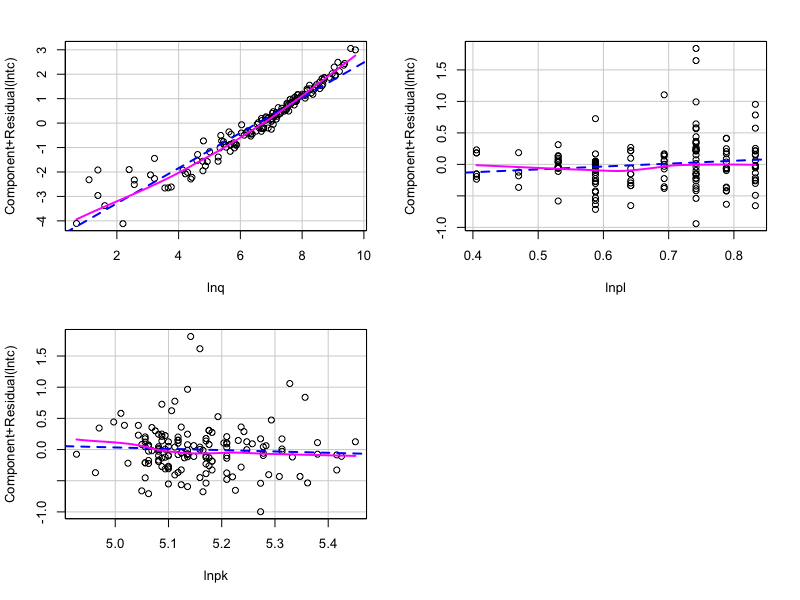

In [76]:
library(car)
crPlots(fit)

In [77]:
# 同方差性
library(car)
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 96.53269, Df = 1, p = < 2.22e-16

警告信息:
In spreadLevelPlot.lm(fit) : 
16 negative fitted values removed


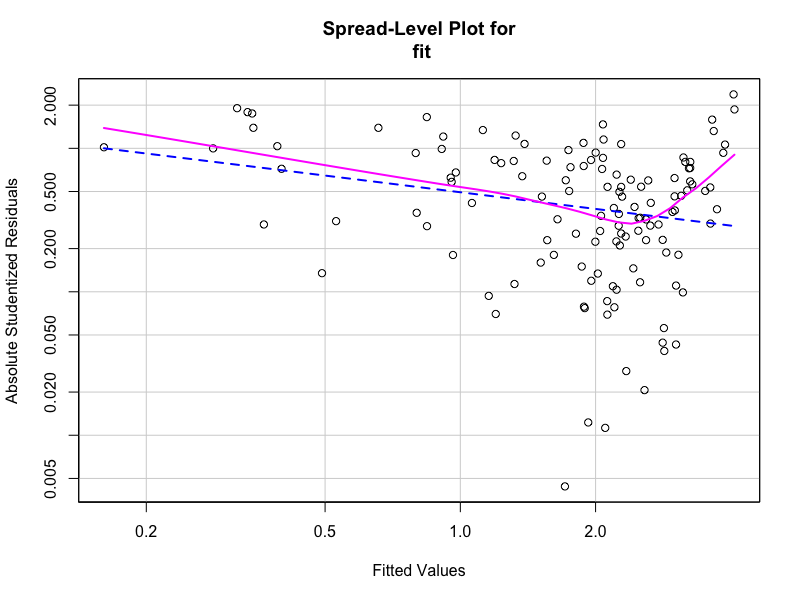


Suggested power transformation:  1.38625 

In [78]:
library(car)
spreadLevelPlot(fit)

## 检验线性假设

In [34]:
# 使用car包检验线性假设
library(car)
linearHypothesis(fit, "lnq = 1")


Linear hypothesis test:
lnq = 1

Model 1: restricted model
Model 2: lntc ~ lnq + lnpl + lnpk + lnpf

  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1    141 60.975                                  
2    140 21.542  1    39.433 256.27 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [37]:
# 同时检验多个假设
linearHypothesis(fit, c("lnq = 1", "lnpl + lnpk + lnpf = 1"))


Linear hypothesis test:
lnq = 1
lnpl  + lnpk  + lnpf = 1

Model 1: restricted model
Model 2: lntc ~ lnq + lnpl + lnpk + lnpf

  Res.Df    RSS Df Sum of Sq      F    Pr(>F)    
1    142 60.978                                  
2    140 21.542  2    39.436 128.15 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [38]:
linearHypothesis(fit, c("lnpl = 0", "lnpk = 0"))


Linear hypothesis test:
lnpl = 0
lnpk = 0

Model 1: restricted model
Model 2: lntc ~ lnq + lnpl + lnpk + lnpf

  Res.Df    RSS Df Sum of Sq      F Pr(>F)
1    142 22.064                           
2    140 21.542  2   0.52158 1.6948 0.1874

## 检验非线性假设

In [50]:
# 进行非线性假设检验，使用Delta法计算
library(car)
deltaMethod(fit, g = "lnpl - lnq^2", vcov = vcov(fit))

              Estimate        SE     2.5 % 97.5 %
lnpl - lnq^2 -0.063752  0.302571 -0.656781 0.5293

In [54]:
coefficients(fit)

(Intercept)         lnq        lnpl        lnpk        lnpf 
 -3.5665128   0.7209135   0.4559645  -0.2151476   0.4258137 

In [53]:
library(nlWaldTest)
nlWaldtest(fit, text = "b[3] = b[2]^2")


	Wald Chi-square test of a restriction on model parameters

data:  fit
Chisq = 0.044394, df = 1, p-value = 0.8331


In [81]:
library(nlWaldTest)
nlWaldtest(fit, text = "b[3] = b[2]^2; b[4] = b[2]^2")


	Wald Chi-square test of restrictions on model parameters

data:  fit
Chisq = 4.8075, df = 2, p-value = 0.09038


In [55]:
install.packages("restriktor")

还安装依赖关系‘sandwich’, ‘mnormt’, ‘pbivnorm’, ‘gmm’, ‘globals’, ‘listenv’, ‘parallelly’, ‘lavaan’, ‘tmvtnorm’, ‘quadprog’, ‘norm’, ‘future’, ‘future.apply’, ‘progressr’



试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/sandwich_3.1-1.tgz'
Content type 'application/x-gzip' length 1503414 bytes (1.4 MB)
downloaded 1.4 MB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/mnormt_2.1.1.tgz'
Content type 'application/x-gzip' length 217069 bytes (211 KB)
downloaded 211 KB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/pbivnorm_0.6.0.tgz'
Content type 'application/x-gzip' length 26894 bytes (26 KB)
downloaded 26 KB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/gmm_1.8.tgz'
Content type 'application/x-gzip' length 1438237 bytes (1.4 MB)
downloaded 1.4 MB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/globals_0.16.3.tgz'
Content type 'application/x-gzip' length 108635 bytes (106 KB)
downloaded 106 KB

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/listenv_0.9.1.tgz'
Content type 'application/x-gzip' length 106750 bytes (104 KB)
downloaded


下载的二进制程序包在
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpxlOBpY/downloaded_packages里


In [59]:
# 进行约束回归
library(restriktor)
fit_res <- restriktor(fit, constraints = "lnpl + lnpk + lnpf == 1")
summary(fit_res)


Call:
conLM.lm(object = object, constraints = constraints)

Restriktor: restricted linear model:

Residuals:
      Min        1Q    Median        3Q       Max 
-1.001288 -0.219453 -0.005447  0.158176  1.808806 

Coefficients:
             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -4.636069   0.894992 -5.1800 7.577e-07 ***
lnq          0.721336   0.017391 41.4772 < 2.2e-16 ***
lnpl         0.606469   0.207239  2.9264  0.004002 ** 
lnpk        -0.020837   0.193339 -0.1078  0.914327    
lnpf         0.414368   0.098783  4.1947 4.824e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.39155 on 140 degrees of freedom
Standard errors: standard 
Multiple R-squared reduced from 0.926 to 0.926 

Generalized order-restricted information criterion: 
 Loglik Penalty   goric 
-67.759   5.000 145.518 




In [60]:
fit_res <- restriktor(fit, constraints = "lnpl + lnpk + lnpf == 1; lnq == 1")
summary(fit_res)


Call:
conLM.lm(object = object, constraints = constraints)

Restriktor: restricted linear model:

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67583 -0.34103 -0.17172  0.04431  3.18284 

Coefficients:
            Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -7.92692    1.45791 -5.4372 2.343e-07 ***
lnq          1.00000    0.00000  0.0000    1.0000    
lnpl         0.15590    0.34363  0.4537    0.6508    
lnpk         0.14435    0.32312  0.4467    0.6557    
lnpf         0.69975    0.16262  4.3031 3.144e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6553 on 140 degrees of freedom
Standard errors: standard 
Multiple R-squared reduced from 0.926 to 0.894 

Generalized order-restricted information criterion: 
 Loglik Penalty   goric 
-142.95    4.00  293.89 




# 大样本OLS

需要注意到，使用稳健标准误并不会改变其他数值比如参数，只会影响标准误，进而影响假设检验。

In [82]:
# 小样本OLS
fit <- lm(lntc ~ lnq + lnpl + lnpk + lnpf, data = nerlove)
summary(fit)


Call:
lm(formula = lntc ~ lnq + lnpl + lnpk + lnpf, data = nerlove)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97203 -0.23377 -0.01091  0.16185  1.80985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.56651    1.77938  -2.004    0.047 *  
lnq          0.72091    0.01743  41.352  < 2e-16 ***
lnpl         0.45596    0.29980   1.521    0.131    
lnpk        -0.21515    0.33983  -0.633    0.528    
lnpf         0.42581    0.10032   4.244 3.97e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3923 on 140 degrees of freedom
Multiple R-squared:  0.926,	Adjusted R-squared:  0.9239 
F-statistic: 437.9 on 4 and 140 DF,  p-value: < 2.2e-16


In [83]:
install.packages("sandwich")

试开URL’https://cran.rstudio.com/bin/macosx/big-sur-arm64/contrib/4.4/sandwich_3.1-1.tgz'
Content type 'application/x-gzip' length 1503414 bytes (1.4 MB)
downloaded 1.4 MB




下载的二进制程序包在
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpxlOBpY/downloaded_packages里


In [86]:
# 使用sandwich包获取稳健标准误
library(sandwich)
robust_se <- vcovHC(fit, type = "HC0")

# 获得结果
summary(fit, vcov = robust_se)


Call:
lm(formula = lntc ~ lnq + lnpl + lnpk + lnpf, data = nerlove)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97203 -0.23377 -0.01091  0.16185  1.80985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.56651    1.77938  -2.004    0.047 *  
lnq          0.72091    0.01743  41.352  < 2e-16 ***
lnpl         0.45596    0.29980   1.521    0.131    
lnpk        -0.21515    0.33983  -0.633    0.528    
lnpf         0.42581    0.10032   4.244 3.97e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3923 on 140 degrees of freedom
Multiple R-squared:  0.926,	Adjusted R-squared:  0.9239 
F-statistic: 437.9 on 4 and 140 DF,  p-value: < 2.2e-16


In [88]:
library(lmtest)
coeftest(fit, robust_se)


t test of coefficients:

             Estimate Std. Error t value  Pr(>|t|)    
(Intercept) -3.566513   1.688418 -2.1123   0.03643 *  
lnq          0.720913   0.031972 22.5485 < 2.2e-16 ***
lnpl         0.455964   0.255798  1.7825   0.07683 .  
lnpk        -0.215148   0.317747 -0.6771   0.49946    
lnpf         0.425814   0.072786  5.8502 3.318e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [89]:
linearHypothesis(fit, "lnq = 1", vcov. = robust_se)


Linear hypothesis test:
lnq = 1

Model 1: restricted model
Model 2: lntc ~ lnq + lnpl + lnpk + lnpf

Note: Coefficient covariance matrix supplied.

  Res.Df Df      F    Pr(>F)    
1    141                        
2    140  1 76.199 6.892e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [91]:
linearHypothesis(fit, "lnq = 1", vcov. = robust_se, test = "Chisq")


Linear hypothesis test:
lnq = 1

Model 1: restricted model
Model 2: lntc ~ lnq + lnpl + lnpk + lnpf

Note: Coefficient covariance matrix supplied.

  Res.Df Df  Chisq Pr(>Chisq)    
1    141                         
2    140  1 76.199  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [92]:
library(nlWaldTest)
nlWaldtest(fit, text = "b[3] = b[2]^2", Vcov = robust_se)


	Wald Chi-square test of a restriction on model parameters

data:  fit
Chisq = 0.056037, df = 1, p-value = 0.8129


In [98]:
waldtest(fit,  vcov = robust_se)

Wald test

Model 1: lntc ~ lnq + lnpl + lnpk + lnpf
Model 2: lntc ~ 1
  Res.Df Df      F    Pr(>F)    
1    140                        
2    144 -4 183.51 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [99]:
waldtest(fit,  vcov = robust_se, test = "Chisq")

Wald test

Model 1: lntc ~ lnq + lnpl + lnpk + lnpf
Model 2: lntc ~ 1
  Res.Df Df  Chisq Pr(>Chisq)    
1    140                         
2    144 -4 734.05  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1